In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json

matplotlib.style.use('default')

In [3]:
# use numpy's random seed to create predictable set of random numbers
# as we want to generate the same 'random' line sets as shown in the book...
np.random.seed(9989)

## Interactive Plotting with Pyplot’s Global State

In [4]:
from datetime import datetime

x = pd.period_range(datetime.now(),
periods=200, freq='d')
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(200,3).cumsum(0)

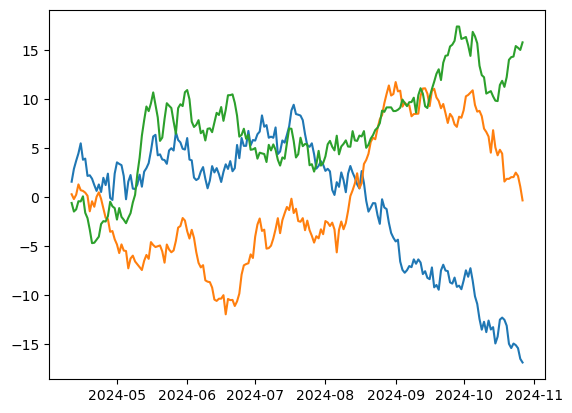

In [5]:
plots = plt.plot(x, y)

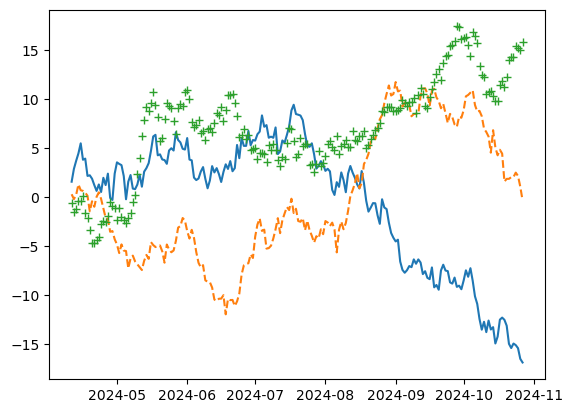

In [6]:
# To add line styles create the lines sequentially 
plots = plt.plot(x, y[:,0], '-', x, y[:,1], '--', x, y[:,2], '+')

In [7]:
y[0]

array([ 1.56477074,  0.2865661 , -0.60274763])

In [8]:
y[:,0]

array([  1.56477074,   2.87226153,   3.70038833,   4.45665204,
         5.47944463,   3.80552205,   3.91832506,   2.15350077,
         2.21982388,   1.87235496,   1.22170261,   0.62801842,
         1.28387901,   0.5142736 ,   1.9624095 ,   1.22139648,
         2.38519411,  -0.08687031,  -0.29494169,   2.39368129,
         3.53760906,   3.37893498,   3.25476465,   2.14069198,
        -0.22431978,   1.57277901,   2.24553589,   0.86411423,
         0.80592721,   1.27725471,   2.28265319,   1.05879918,
         2.58670475,   2.95128991,   3.45954845,   4.70384969,
         6.17886033,   6.34476539,   4.25553394,   4.35406352,
         3.83088338,   3.77403178,   3.38808782,   4.75025035,
         4.97801902,   4.74422313,   6.61441114,   5.81852656,
         5.57107374,   4.92234107,   4.8435738 ,   6.01336089,
         3.82404654,   3.74127355,   1.98402831,   1.73305604,
         1.89061375,   2.59806832,   3.05462986,   1.86440477,
         0.89357246,   1.68553961,   3.15466372,   2.51

## Configuring Matplotlib

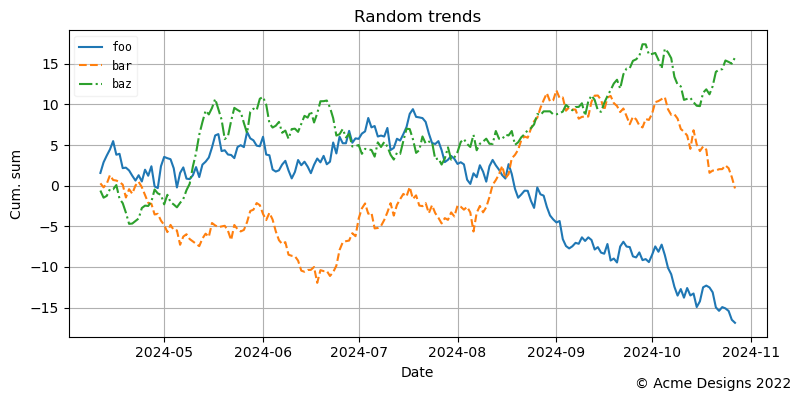

In [9]:
#plots = plt.plot(x, y, label='')
plots = plt.plot(x, y[:,0], '-', x, y[:,1], '--', x, y[:,2], '-.')
plt.gcf().set_size_inches(8, 4)
plt.legend(plots, ('foo', 'bar', 'baz'), loc='best', framealpha=0.25,
prop={'size':'small', 'family':'monospace'})
plt.title('Random trends')
plt.xlabel('Date')
plt.ylabel('Cum. sum')
plt.grid(True)
plt.figtext(0.995, 0.01, '© Acme Designs 2022',
ha='right', va='bottom')
# To save any charts, apply a tight layout first
plt.gcf().set_tight_layout(True)
plt.savefig('mpl_3lines_custom.png', dpi=300)

In [10]:
def generate_random_data(seed=9989):
    """Takes a random seed and produces some dummy time series data."""
    np.random.seed(9989)
    x = pd.period_range(pd.datetime.now(), periods=200, freq='d')
    x = x.to_timestamp().to_pydatetime()
    y = np.random.randn(200,3).cumsum(0)
    return x,y

## Figures and Object-Oriented Matplotlib

## Axes and Subplots

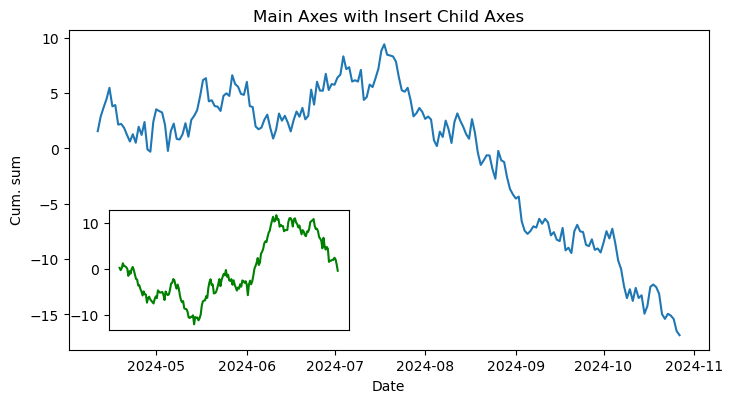

In [11]:
fig = plt.figure(figsize=(8,4))
#--- Main Axes
ax = fig.add_axes((0.1,0.1,0.8,0.8))
ax.set_title('Main Axes with Insert Child Axes')
ax.plot(x, y[:,0])
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
#--- Inserted Axes
ax = fig.add_axes([0.15,0.15,0.3,0.3]) # Position wird definiert durch 4-Elementige Liste
ax.plot(x, y[:,1], color='g')
ax.set_xticks([]); # der embedded Plot enthält keine Achsenbeschriftung

Text(0.5, 0, 'Date')

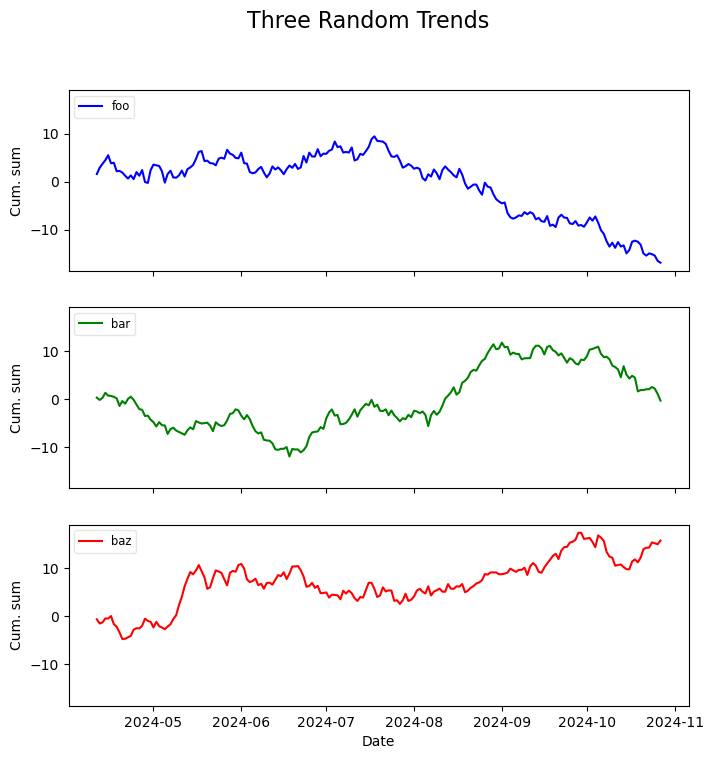

In [12]:
fig, axes = plt.subplots(nrows=3,ncols=1, # 3 Reihen und 1 Spalte im Subplot Grid
                         sharex=True, sharey=True, figsize=(8,8)) # Gleiche x und y Achsenbereiche für Vergleichbarkeit
labelled_data = zip(y.transpose(), ('foo', 'bar', 'baz'), ('b', 'g', 'r')) # zip erstellt ein Tupel aus y, der Beschriftung und Farbcodierung um durchiterieren zu können
fig.suptitle('Three Random Trends', fontsize=16)
for i, ld in enumerate(labelled_data): # iteriere durch die Elemente der Daten
    ax = axes[i]
    ax.plot(x, ld[0], label=ld[1], color=ld[2])
    ax.set_ylabel('Cum. sum')
    ax.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
axes[-1].set_xlabel('Date')

In [13]:
# zip Funktion
letters =['a', 'b']
numbers = [1, 2]
ln = zip(letters, numbers)
print(list(ln))

[('a', 1), ('b', 2)]


## Plot Types

### Bar Charts

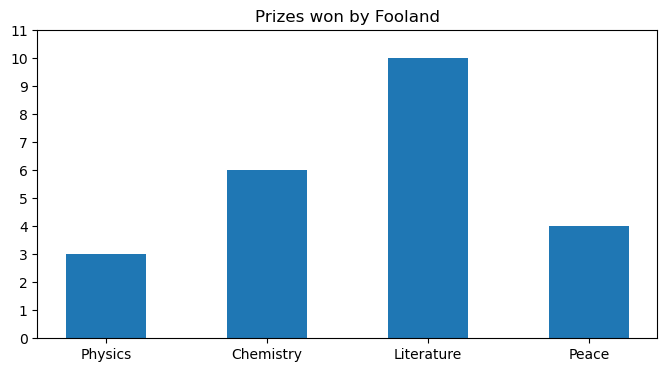

In [14]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
data =   [3, 6, 10, 4]

bar_width = 0.5
# Manuelle Definition der Baleken und Label Platzierung
# Pandas kommt mit build-in Matplotlib Plots, diese sind nutzerfreundlicher
xlocations = np.array(range(len(data))) + bar_width # Platzierung der Balken und Definition des Abstands
plt.bar(xlocations, data, width=bar_width)
plt.yticks(range(0, 12)) # Bereich der y-Achse
plt.xticks(xlocations, labels) # Platziert die Beschriftung der Balken
plt.title("Prizes won by Fooland")
plt.gca().get_xaxis().tick_bottom() # gca: get current axes
plt.gca().get_yaxis().tick_left()
plt.gcf().set_size_inches((8,4)) # Größe der Grafik

Text(0.5, 0.98, 'Prizes by country')

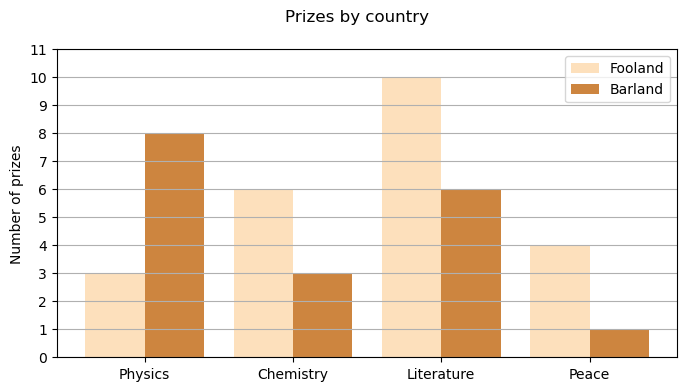

In [15]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data =   [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.4 # bar width
xlocs = np.arange(len(foo_data))
# Manuelle Anordnung der Balken im Abstand bar_width
ax.bar(xlocs-bar_width, foo_data, bar_width, color='#fde0bc', label='Fooland') # HTML colors Hex-codiert oder mit name
ax.bar(xlocs, bar_data, bar_width, color='peru', label='Barland')
# --- labels, grids and title, then save
ax.set_yticks(range(12)) # y-Achsenabschnitt
ax.set_xticks(ticks=xlocs-bar_width/2) # Position der Beschriftung der x-Achses
ax.set_xticklabels(labels) # Beschriftung der x-Achse
ax.yaxis.grid(True) # Aktivieren des Grids
ax.legend(loc='best') # Hinzufügen der Legende
ax.set_ylabel('Number of prizes')
fig.suptitle('Prizes by country')

Text(0.5, 0.98, 'Prizes by country')

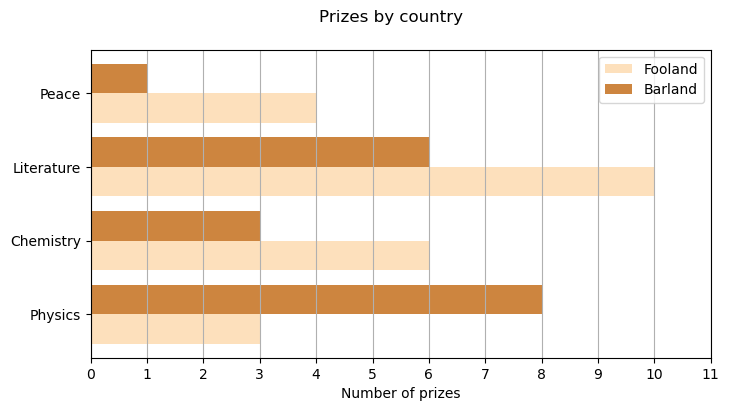

In [16]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data =   [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.4
ylocs = np.arange(len(foo_data))
# Gleiche Vorgehensweise wie oben, nur barh-Funktion wird verwendet für horizontale Bar-Charts
ax.barh(ylocs-bar_width, foo_data, bar_width, color='#fde0bc', label='Fooland') 
ax.barh(ylocs, bar_data, bar_width, color='peru', label='Barland')
# --- labels, grids and title, then save
ax.set_xticks(range(12))
ax.set_yticks(ticks=ylocs-bar_width/2)
ax.set_yticklabels(labels)
ax.xaxis.grid(True)
ax.legend(loc='best')
ax.set_xlabel('Number of prizes')
fig.suptitle('Prizes by country')

Text(0.5, 0.98, 'Prizes by country')

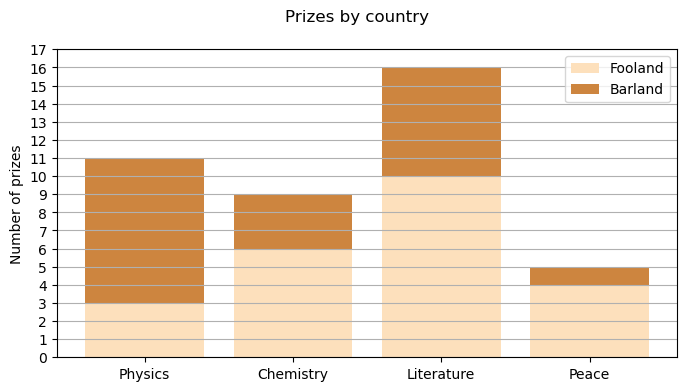

In [17]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data =   [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

# Stacked Bar Chart
fig, ax = plt.subplots(figsize=(8, 4))
width = 0.8 # bar width
xlocs = np.arange(len(foo_data))
ax.bar(xlocs, foo_data, width, color='#fde0bc', label='Fooland')
# bottom Argument ermöglicht den Stacked Chart
ax.bar(xlocs, bar_data, width, color='peru', label='Barland', bottom=foo_data) 
# --- labels, grids and title, then save
ax.set_yticks(range(18))
ax.set_xticks(ticks=xlocs)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Number of prizes')
fig.suptitle('Prizes by country')

### Scatter Plots

Text(0.5, 0.98, 'A Simple Scatterplot')

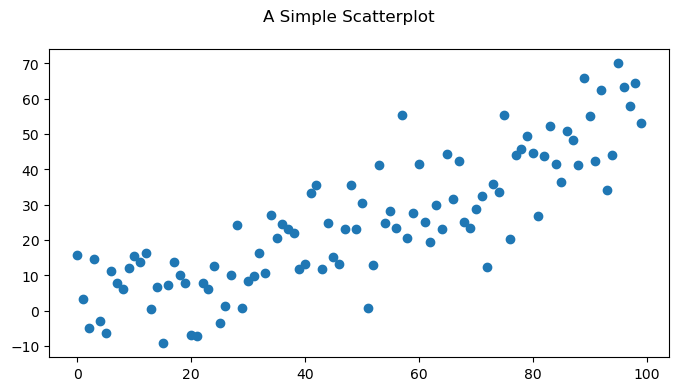

In [18]:
np.random.seed(9989)
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
# Lineare Abhängigkeit zwischen x und y mit y=b+m*x
# Die Steigung ist 0.5
# Auf jeden Punkt wir eine normalverteilte Zufallsvaribale addiert
# N(0,10), Mittelwert 0, Standardabweichung 10
y = np.random.randn(num_points) * 10 + x*gradient 
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.scatter(x, y)

fig.suptitle('A Simple Scatterplot')

Text(0.5, 0.98, 'A Simple Scatterplot')

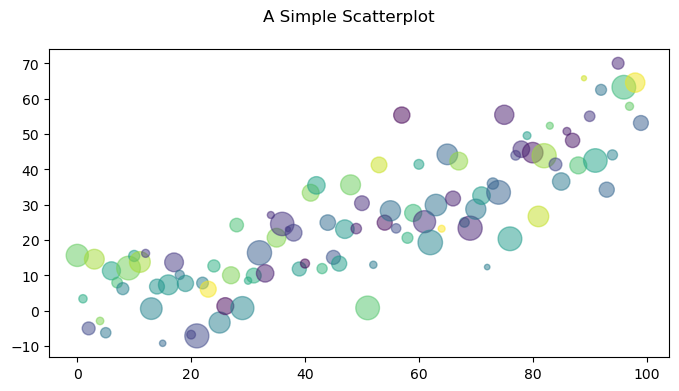

In [19]:
np.random.seed(9989)
num_points = 100
gradient = 0.5 # Steigung 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))
# Erzeuge zufällige Farbwerte für die Default color map, floats zwischen 0 und 1
colors = np.random.rand(num_points)
# Width range der Marker, hier wird nicht der Markerdurchmesser verändert, sondern die Größe der Bounding Box
size = np.pi * (2 + np.random.rand(num_points) * 8) ** 2 # quadrierte Werte zwischen 2 und 10
ax.scatter(x, y, s=size, c=colors, alpha=0.5) # Halbtransparente Marker durch das alpha-Argument

fig.suptitle('A Simple Scatterplot')

Text(0.5, 0.98, 'Scatterplot With Regression-line')

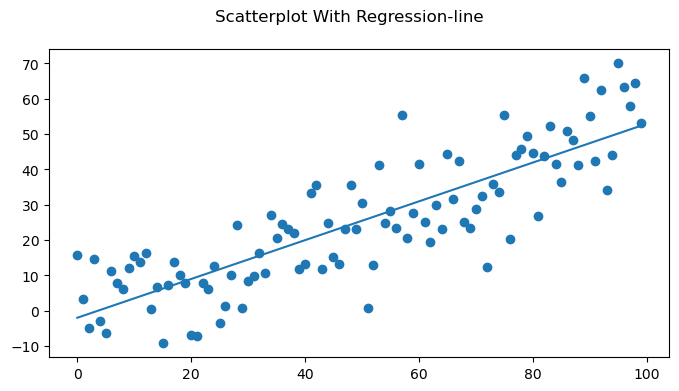

In [20]:
# Hinzufügen einer Regressionsgeraden
np.random.seed(9989)
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)
# Bestimmung des y-Achsenabschnitts (c) und der Steigung (m)
# Polynom ersten Grades y=m*x+b
m, c = np.polyfit(x, y ,1)
ax.plot(x, m*x + c) # Plotten der Regressionsgeraden
fig.suptitle('Scatterplot With Regression-line')

## Seaborn

In [21]:
import seaborn as sns

matplotlib.style.use('seaborn')
sns.set_theme(font_scale=1.0)

/var/folders/6c/dyyvnpq12xq0w61ycdhc2blh0000gn/T/ipykernel_1467/80191126.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


In [22]:
np.random.seed(9989)
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient # randn standardnormalverteilte Variable (Mittelwert 0 und Standardabweichung 1)

In [23]:
data = pd.DataFrame({'dummy x':x, 'dummy y':y})

In [24]:
data.head()

,dummy x,dummy y
0,0,15.647707
1,1,3.365661
2,2,-5.027476
3,3,14.574908
4,4,-2.916389


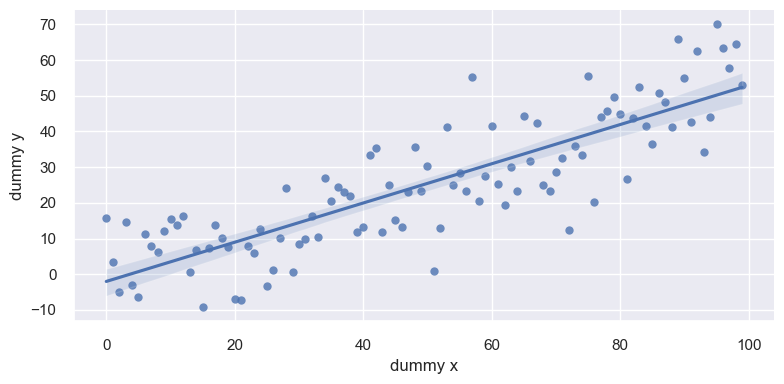

In [25]:
# seaborns linear regression plot lmplot
# height: height der Grafik in inches
# aspect: width/height
sns.lmplot(data=data, x='dummy x', y='dummy y', height=4, aspect=2)

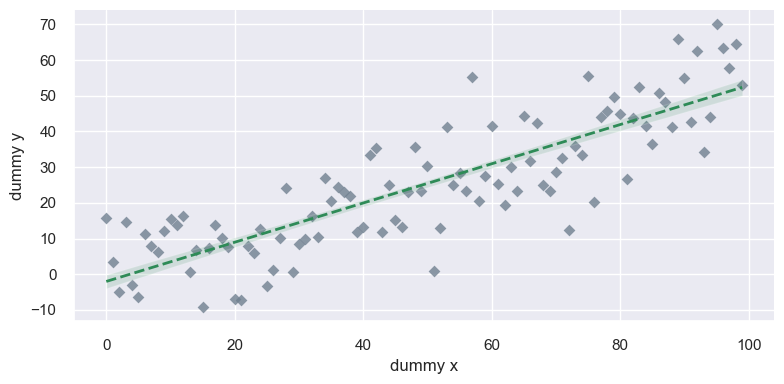

In [26]:
#sns.set_context(rc={"figure.figsize": (8, 4)})
sns.lmplot(data=data, x='dummy x', y='dummy y', height=4, aspect=2,
scatter_kws={"color": "slategray"}, # Farbe der Datenpunkte grau
           line_kws={"linewidth": 2, "linestyle":'--', "color": "seagreen"},  # Regressionsgerade verändern       
           markers='D', ci=68 # Datenpunkte als Diamonds, Schätzwert des Standardfehlers auf ein Confidence Interval von 68% setzen
           )

## FacetGrids

In [27]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


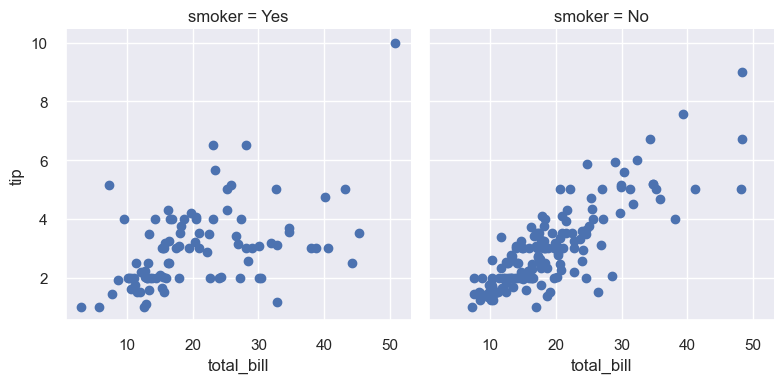

In [28]:
g = sns.FacetGrid(tips, col="smoker", height=4, aspect=1)
g.map(plt.scatter, "total_bill", "tip")

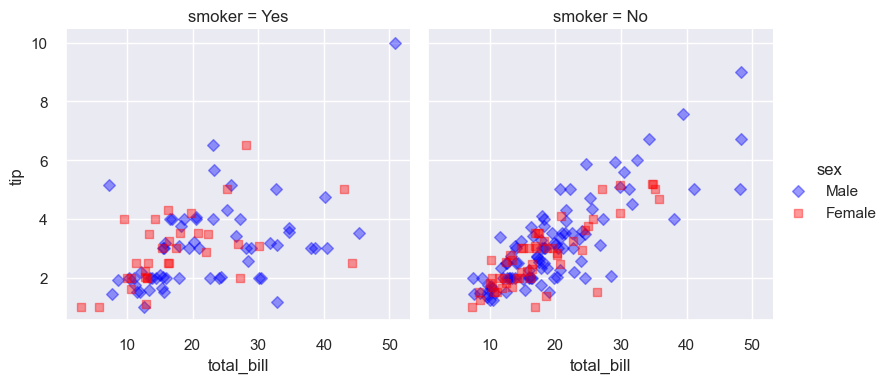

In [29]:
pal = dict(Female='red', Male='blue') # Female und Male farblich unterscheiden
g = sns.FacetGrid(tips, col="smoker", hue="sex", palette=pal, height=4, aspect=1, hue_kws={"marker": ["D", "s"]}) # verschiedene Marker für die farblich unterschiedenen Kategorien
g.map(plt.scatter, "total_bill", "tip", alpha=.4)
g.add_legend();
plt.savefig('dvpj_1015.png', dpi=300)

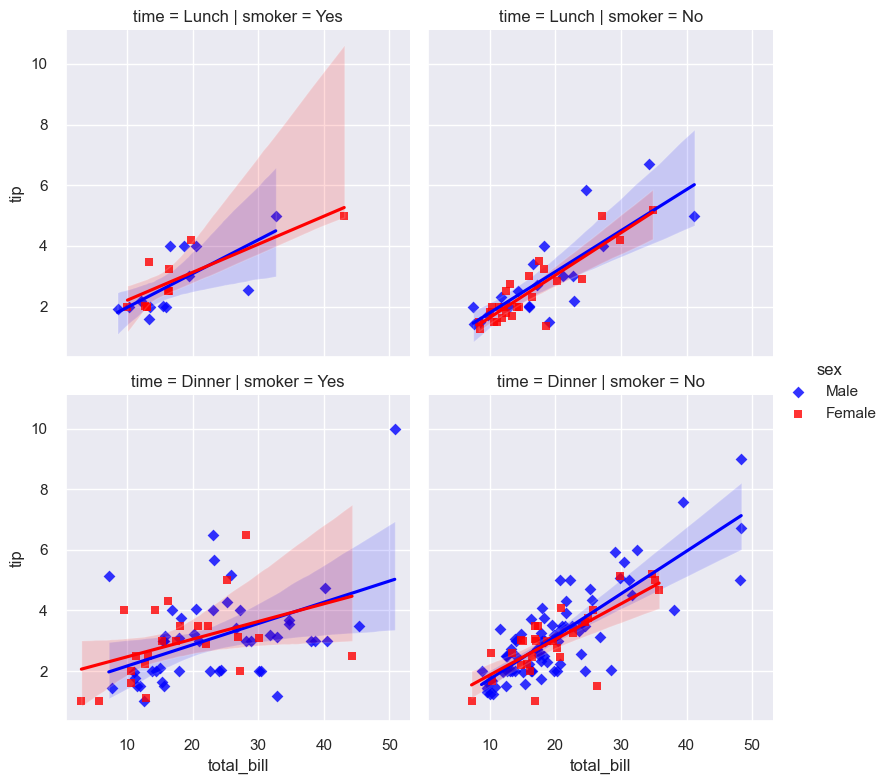

In [30]:
# Analyse von 5 Dimensionen - total_bill, tip, smoker, time, sex
pal = dict(Female='red', Male='blue')
g = sns.FacetGrid(tips, col="smoker", row="time", hue="sex", palette=pal, height=4, aspect=1, hue_kws={"marker": ["D", "s"]})
g.map(sns.regplot, "total_bill", "tip") # regplot - regression plot äquivalent zu lmplot 
g.add_legend();
plt.savefig('dvpj_1016.png', dpi=300)

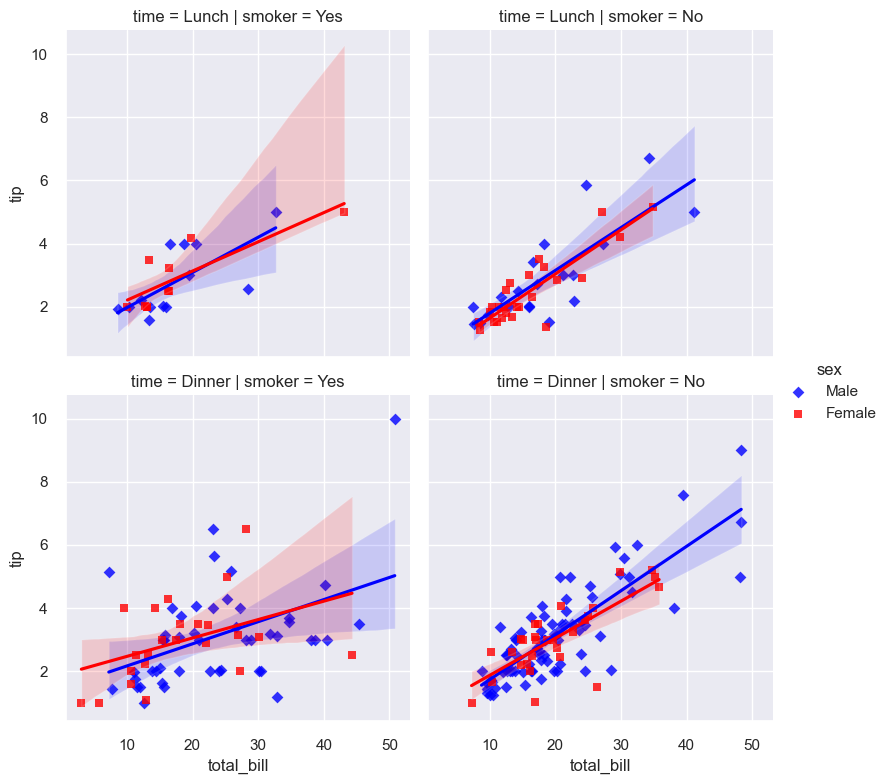

In [31]:
pal = dict(Female='red', Male='blue')

# Alternativ, etwas schneller das selbe Ergebnis mit Hilfe von lmplot
sns.lmplot(x="total_bill", y="tip", hue="sex", 
           height=4, aspect=1, markers=["D", "s"],
           col="smoker", row="time", data=tips, palette=pal           
           );

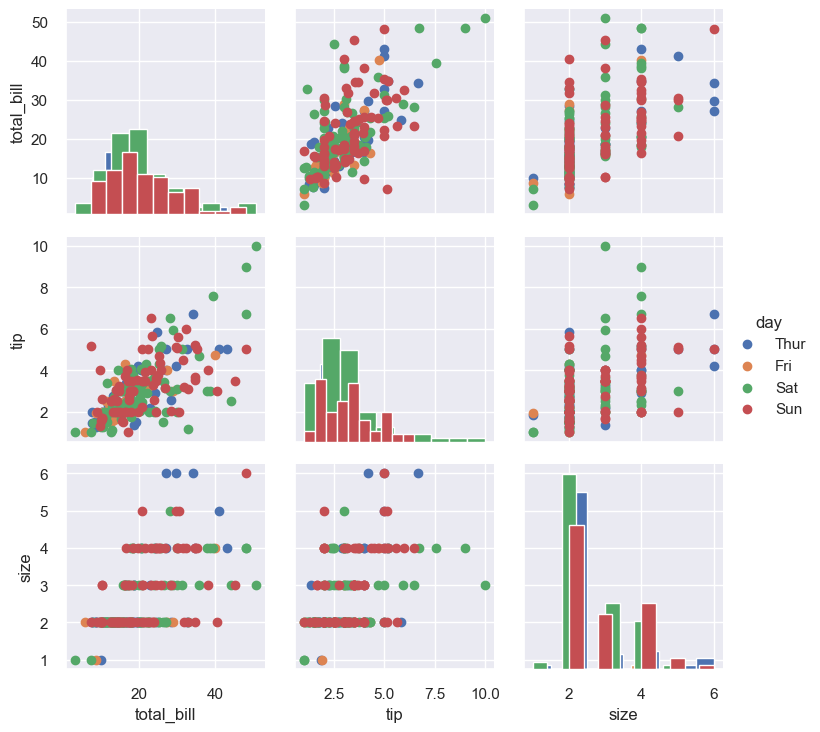

In [32]:
g = sns.PairGrid(tips, hue='day')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

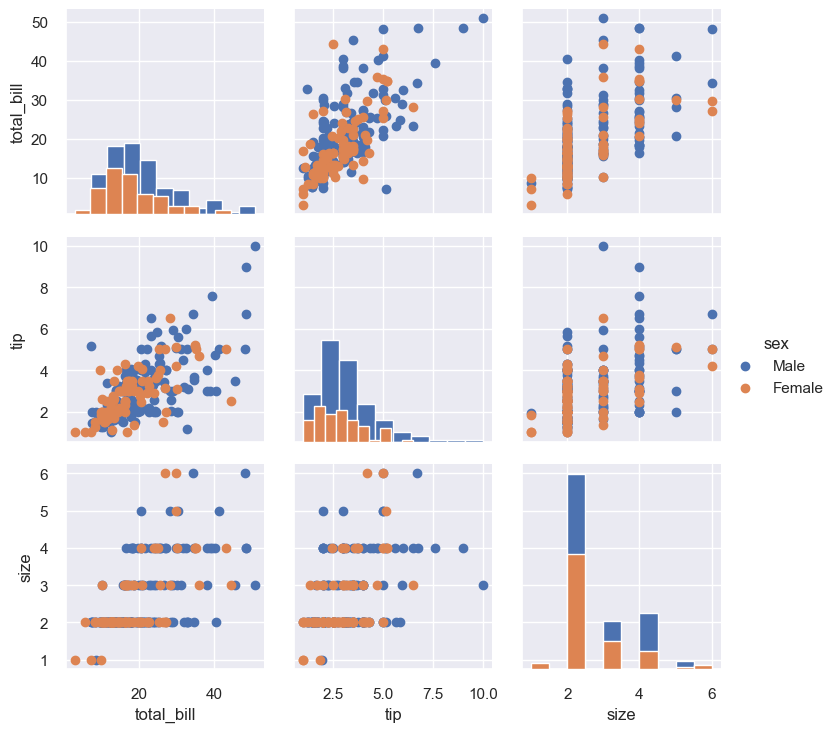

In [33]:
g = sns.PairGrid(tips, hue='sex')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

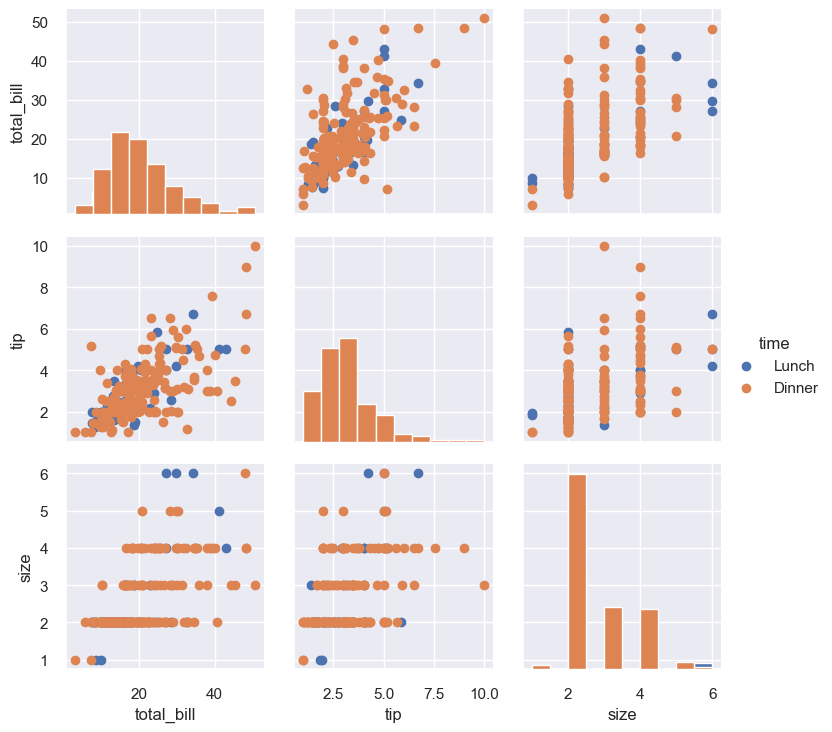

In [34]:
g = sns.PairGrid(tips, hue='time')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

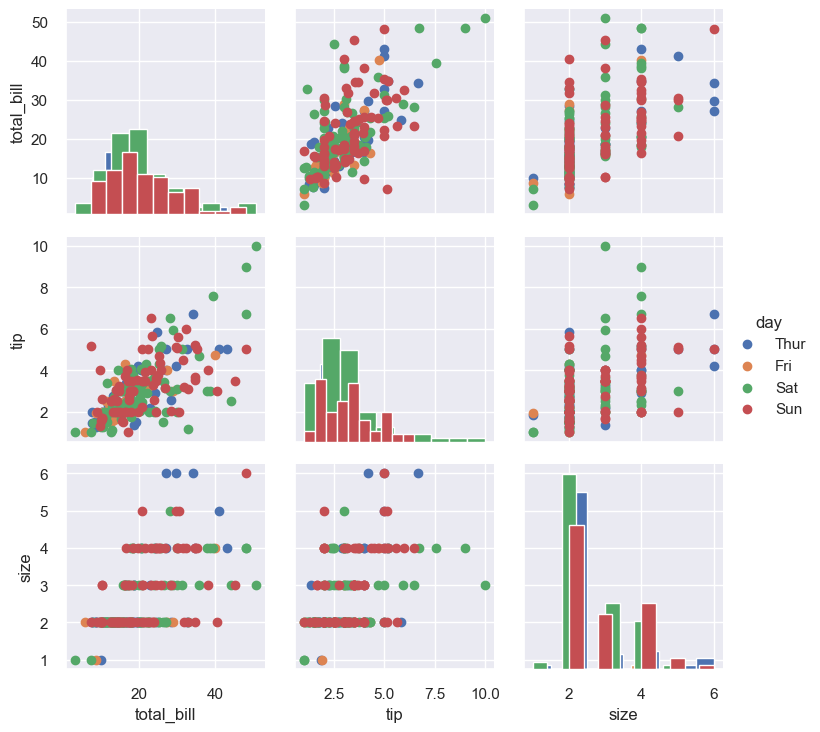

In [41]:
g = sns.PairGrid(tips, hue='day')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

## Pairgrids

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


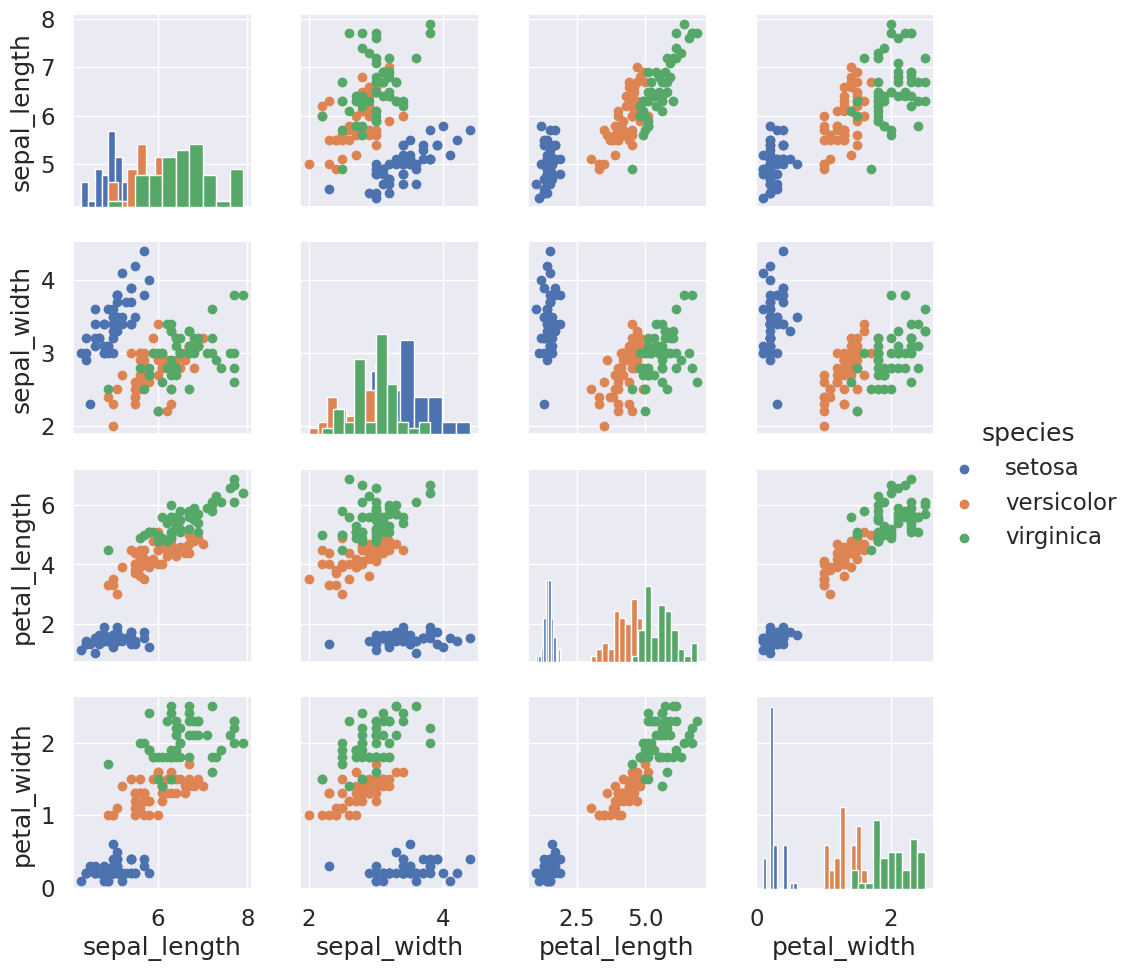

In [44]:
sns.set_theme(font_scale=1.5)
g = sns.PairGrid(iris, hue="species")#, height=6, aspect=1)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
#plt.savefig('dvpj_1017.png', dpi=300)